In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.0/984.0 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 956.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import cv2
import torch
from ultralytics import YOLO

# Load pre-trained YOLOv5 model
model = YOLO('yolov5s.pt')

# Open video feed
cap = cv2.VideoCapture('traffic_video.mp4')  # Replace with your video source

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection
    results = model(frame)

    # Draw bounding boxes on detected vehicles
    for result in results.xyxy[0]:
        x1, y1, x2, y2, conf, cls = result.tolist()
        if int(cls) in [2, 3, 5, 7]:  # Classes for vehicles (cars, trucks, buses)
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

    cv2.imshow('Vehicle Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 24.9MB/s]


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load traffic data
data = pd.read_csv('traffic.csv')  # Replace with actual dataset


In [ ]:
traffic_flow = data['Vehicles'].values.reshape(-1, 1)

In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
traffic_flow = scaler.fit_transform(traffic_flow)

In [ ]:

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10
X, y = create_sequences(traffic_flow, seq_length)

In [ ]:
# Split into train/test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - loss: 0.0032 - val_loss: 9.4330e-04
Epoch 2/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 7.6392e-04 - val_loss: 0.0010
Epoch 3/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - loss: 6.8364e-04 - val_loss: 9.6796e-04
Epoch 4/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 6.8937e-04 - val_loss: 9.6085e-04
Epoch 5/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - loss: 6.5362e-04 - val_loss: 8.7607e-04
Epoch 6/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - loss: 6.0981e-04 - val_loss: 8.3514e-04
Epoch 7/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - loss: 6.0149e-04 - val_loss: 8.2370e-04
Epoch 8/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 5.5679e-04 - val_loss: 7.9808e-04
Epoch 9/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 5.7972e-04 - val_loss: 8.0785e-04
Epoch 10/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 5.9699e-04 - val_loss: 7.9364e-04
Epoch 11/20
2406/2406 ━━━━━

after adding dropout layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model with dropout
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),  # Dropout to prevent overfitting
    LSTM(50, activation='relu'),
    Dropout(0.2),  # Additional dropout
    Dense(1)  # Output layer
])

# Compile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - loss: 0.0051 - val_loss: 0.0013
Epoch 2/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0011 - val_loss: 9.5300e-04
Epoch 6/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - loss: 9.6037e-04 - val_loss: 9.6521e-04
Epoch 7/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 9.4804e-04 - val_loss: 9.1897e-04
Epoch 8/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - loss: 8.8144e-04 - val_loss: 8.9460e-04
Epoch 9/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - loss: 9.1543e-04 - val_loss: 8.9037e-04
Epoch 10/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - loss: 9.1172e-04 - val_loss: 8.9307e-04
Epoch 11/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/ste

KeyboardInterrupt: 

#reduce the dropout rate slightly
#increase the number of training epochs
#introduce learning rate decay
#use tanh activation instead of relu in LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model with dropout
model = Sequential([
    LSTM(50, activation='tanh', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.1),  # Dropout to prevent overfitting
    LSTM(50, activation='tanh'),
    Dropout(0.1),  # Additional dropout
    Dense(1)  # Output layer
])

# Compile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0005, decay=1e-6), loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/50
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 2/50
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - loss: 9.5554e-04 - val_loss: 9.3189e-04
Epoch 3/50
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - loss: 8.5430e-04 - val_loss: 8.9050e-04
Epoch 4/50
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 8.0662e-04 - val_loss: 9.4122e-04
Epoch 5/50
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - loss: 8.3038e-04 - val_loss: 9.0444e-04
Epoch 6/50
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - loss: 8.2810e-04 - val_loss: 8.8151e-04
Epoch 7/50
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - loss: 7.9269e-04 - val_loss: 8.8439e-04
Epoch 8/50
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 7.5998e-04 - val_loss: 8.7076e-04
Epoch 9/50
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 7.7089e-04 - val_loss: 9.1233e-04
Epoch 10/50
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 7.6687e-04 - val_loss: 8.6581e-04
Epoch 11/50
2406/2406 ━━━━━

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model with dropout
model = Sequential([
    LSTM(100, activation='tanh', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),  # Dropout to prevent overfitting
    LSTM(100, activation='tanh'),
    Dropout(0.2),  # Additional dropout
    Dense(1)  # Output layer
])

# Compile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-6), loss='mse')

model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 2/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - loss: 9.0800e-04 - val_loss: 8.9101e-04
Epoch 3/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - loss: 8.9474e-04 - val_loss: 9.2084e-04
Epoch 4/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 83s 18ms/step - loss: 8.5083e-04 - val_loss: 9.0879e-04
Epoch 5/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 79s 16ms/step - loss: 8.7409e-04 - val_loss: 8.9577e-04
Epoch 6/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 8.4092e-04 - val_loss: 9.0021e-04
Epoch 7/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - loss: 8.1373e-04 - val_loss: 9.1812e-04
Epoch 8/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 8.2430e-04 - val_loss: 9.3765e-04
Epoch 9/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - loss: 7.8576e-04 - val_loss: 8.5382e-04
Epoch 10/20
2406/2406 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 7.7299e-04 - val_loss: 8.7101e-04
Epoch 11/20
2406/2406 ━━━━━

In [ ]:
# Predict future traffic
future_traffic = model.predict(X_test[-1].reshape(1, seq_length, 1))
print("Predicted Traffic Flow:", scaler.inverse_transform(future_traffic))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
Predicted Traffic Flow: [[     20.105]]


to evaluate the model performance

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)
print("MAE:", mean_absolute_error(y_actual, y_pred_inv))


301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
MAE: 2.92157311363692


Visualialise the predictions

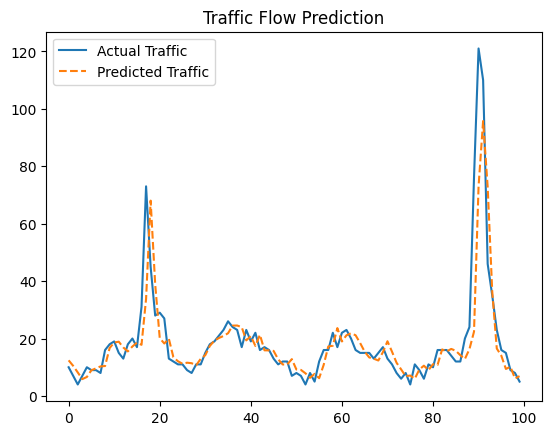

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_actual[:100], label="Actual Traffic")
plt.plot(y_pred_inv[:100], label="Predicted Traffic", linestyle="dashed")
plt.legend()
plt.title("Traffic Flow Prediction")
plt.show()


Make multiple predictions for future steps

In [ ]:
future_steps = 10  # Predicting next 10 time steps
input_seq = X_test[-1].reshape(1, seq_length, 1)

predictions = []
for _ in range(future_steps):
    pred = model.predict(input_seq)
    predictions.append(pred[0, 0])
    input_seq = np.roll(input_seq, -1, axis=1)
    input_seq[0, -1, 0] = pred[0, 0]  # Append new prediction

predicted_traffic = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
print("Future Traffic Predictions:", predicted_traffic)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Future Traffic Predictions: [[     20.105]
 [     19.477]
 [     19.648]
 [     19.664]
 [     19.649]
 [     19.317]
 [     19.505]
 [     21.732]
 [     21.612]
 [     21.676]]


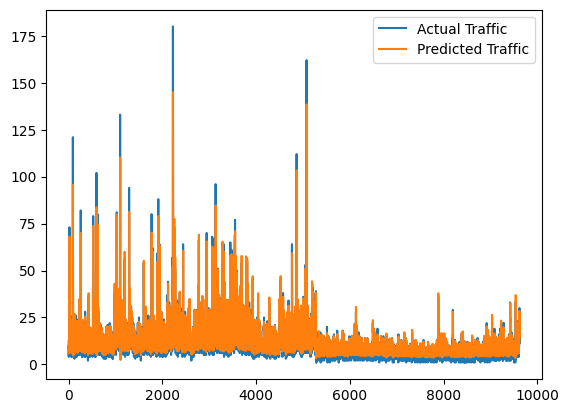

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_actual[:], label="Actual Traffic")
plt.plot(y_pred_inv[:], label="Predicted Traffic")
plt.legend()
plt.show()


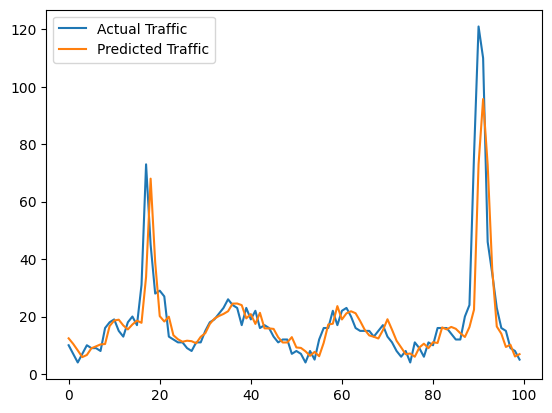

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_actual[:100], label="Actual Traffic")
plt.plot(y_pred_inv[:100], label="Predicted Traffic")
plt.legend()
plt.show()


Reinforcement Learning for Traffic Signal Control

In [ ]:
# Predict future traffic
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Assuming 'traffic_flow' still contains the original data, re-create the scaler:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(traffic_flow)  # Fit to original data to have the same scaling

future_traffic = model.predict(X_test[-1].reshape(1, seq_length, 1))
print("Predicted Traffic Flow:", scaler.inverse_transform(future_traffic))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted Traffic Flow: [[    0.10673]]


Check the inverse transform output

In [ ]:
actual_traffic_flow = scaler.inverse_transform(future_traffic)
print("Actual Predicted Traffic Flow:", actual_traffic_flow)

Actual Predicted Traffic Flow: [[    0.10673]]


In [ ]:
!pip install --upgrade gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827729 sha256=0ec66c6e2d8e50b9af6f8950cd5ae07d8749a36016984ffe9d12de3187c60485
  Stored in directory: /root/.cache/pip/wheels/1c/77/9e/9af5470201a0b0543937933ee99ba884cd237d2faefe8f4d37
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [ ]:
import gym
import numpy as np
import random
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define environment (Simulated traffic intersection)
env = gym.make('CartPole-v1')  # Replace with a traffic simulator (SUMO, CityFlow)

In [ ]:
# Define DQN model
def build_model(state_size, action_size):
    model = Sequential([
        Dense(24, input_dim=state_size, activation='relu'),
        Dense(24, activation='relu'),
        Dense(action_size, activation='linear')
    ])
    # Use learning_rate instead of lr
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

state_size = env.observation_space.shape[0]
action_size = env.action_space.n
model = build_model(state_size, action_size)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train model
def train_dqn(episodes=100):
    memory = deque(maxlen=2000)
    gamma = 0.95  # Discount factor
    epsilon = 1.0  # Exploration rate
    epsilon_min = 0.01
    epsilon_decay = 0.995

    for episode in range(episodes):
        # Get the initial state observation using unpacking
        state, _ = env.reset()
        state = np.reshape(state, [1, state_size])
        total_reward = 0

        for time_step in range(500):
            if np.random.rand() <= epsilon:
                action = random.randrange(action_size)
            else:
                action = np.argmax(model.predict(state)[0])

            # Get the next state, reward, done, and info using unpacking
            next_state, reward, done, _, _ = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            memory.append((state, action, reward, next_state, done))
            state = next_state
            total_reward += reward

            if done:
                print(f"Episode {episode}/{episodes} - Score: {total_reward}")
                break

        if epsilon > epsilon_min:
            epsilon *= epsilon_decay

train_dqn()

AttributeError: module 'numpy' has no attribute 'bool8'

In [ ]:
# Train model
def train_dqn(episodes=100):
    memory = deque(maxlen=2000)
    gamma = 0.95  # Discount factor
    epsilon = 1.0  # Exploration rate
    epsilon_min = 0.01
    epsilon_decay = 0.995

    for episode in range(episodes):
        # Get the initial state observation using unpacking
        state, _ = env.reset()
        state = np.reshape(state, [1, state_size])
        total_reward = 0

        for time_step in range(500):
            if np.random.rand() <= epsilon:
                action = random.randrange(action_size)
            else:
                action = np.argmax(model.predict(state)[0])

            # Get the next state, reward, done, and info using unpacking
            # Use `terminated` and `truncated` flags returned by `env.step`
            next_state, reward, terminated, truncated, info = env.step(action)

            # Set done if either terminated or truncated is True
            done = terminated or truncated
            next_state = np.reshape(next_state, [1, state_size])


            memory.append((state, action, reward, next_state, done))
            state = next_state
            total_reward += reward

            if done:
                print(f"Episode {episode}/{episodes} - Score: {total_reward}")
                break

        if epsilon > epsilon_min:
            epsilon *= epsilon_decay

train_dqn()

Episode 0/100 - Score: 13.0
Episode 1/100 - Score: 15.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Episode 2/100 - Score: 14.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Episode 3/100 - Score: 9.0
Episode 4/100 - Score: 38.0
Episode 5/100 - Score: 30.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Episode 6/100 - Score: 33.0
Episode 7/100 - Score: 14.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Episode 8/100 - Score: 41.0
Episode 9/100 - Score: 20.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Episode 10/100 - Score: 34.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Episode 11/100 - Score: 12.0
Episode 12/100 - Score: 49.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Episode 13/100 - Score: 14.0
Episode 14/100 - Score: 19.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Episode 15/100 - Score: 32.0
1/1 ━━━━━━━

#updated train model

In [ ]:
def train_dqn(episodes=100):
    memory = deque(maxlen=2000)
    gamma = 0.95  # Discount factor
    epsilon = 1.0  # Exploration rate
    epsilon_min = 0.01
    epsilon_decay = 0.995
    batch_size = 32  # How many experiences to sample for training

    for episode in range(episodes):
        state, _ = env.reset()
        state = np.reshape(state, [1, state_size])
        total_reward = 0

        for time_step in range(500):
            # Epsilon-greedy action selection
            if np.random.rand() <= epsilon:
                action = random.randrange(action_size)
            else:
                q_values = model.predict(state, verbose=0)
                action = np.argmax(q_values[0])

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            next_state = np.reshape(next_state, [1, state_size])

            # Save experience in memory
            memory.append((state, action, reward, next_state, done))

            state = next_state
            total_reward += reward

            if done:
                print(f"Episode {episode}/{episodes} - Score: {total_reward} - Epsilon: {epsilon:.2f}")
                break

            # Train the model if memory has enough samples
            if len(memory) > batch_size:
                minibatch = random.sample(memory, batch_size)

                states = np.vstack([sample[0] for sample in minibatch])
                actions = np.array([sample[1] for sample in minibatch])
                rewards = np.array([sample[2] for sample in minibatch])
                next_states = np.vstack([sample[3] for sample in minibatch])
                dones = np.array([sample[4] for sample in minibatch])

                # Predict Q-values for next states
                target_q_values = model.predict(next_states, verbose=0)
                targets = rewards + gamma * np.amax(target_q_values, axis=1) * (1 - dones)

                # Predict Q-values for current states
                q_values = model.predict(states, verbose=0)

                # Update Q-values for the actions taken
                for i, action in enumerate(actions):
                    q_values[i][action] = targets[i]

                # Train the model
                model.fit(states, q_values, epochs=1, verbose=0)

        # Decay exploration rate
        if epsilon > epsilon_min:
            epsilon *= epsilon_decay

train_dqn()

Episode 0/100 - Score: 30.0 - Epsilon: 1.00
Episode 1/100 - Score: 54.0 - Epsilon: 0.99
Episode 2/100 - Score: 39.0 - Epsilon: 0.99
Episode 3/100 - Score: 57.0 - Epsilon: 0.99
Episode 4/100 - Score: 19.0 - Epsilon: 0.98
Episode 5/100 - Score: 57.0 - Epsilon: 0.98
Episode 6/100 - Score: 32.0 - Epsilon: 0.97
Episode 7/100 - Score: 34.0 - Epsilon: 0.97
Episode 8/100 - Score: 13.0 - Epsilon: 0.96
Episode 9/100 - Score: 14.0 - Epsilon: 0.96
Episode 10/100 - Score: 13.0 - Epsilon: 0.95
Episode 11/100 - Score: 18.0 - Epsilon: 0.95
Episode 12/100 - Score: 19.0 - Epsilon: 0.94
Episode 13/100 - Score: 12.0 - Epsilon: 0.94
Episode 14/100 - Score: 18.0 - Epsilon: 0.93
Episode 15/100 - Score: 34.0 - Epsilon: 0.93
Episode 16/100 - Score: 11.0 - Epsilon: 0.92
Episode 17/100 - Score: 13.0 - Epsilon: 0.92
Episode 18/100 - Score: 25.0 - Epsilon: 0.91
Episode 19/100 - Score: 39.0 - Epsilon: 0.91
Episode 20/100 - Score: 14.0 - Epsilon: 0.90
Episode 21/100 - Score: 12.0 - Epsilon: 0.90
Episode 22/100 - Sco